In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\bandh\\Documents\\MSIS program\\Flex 4\\IS8044\\PISSA\\ALLFLOWMETER_HIKARI2021.csv\ALLFLOWMETER_HIKARI2021.csv')
# Display the first few rows of the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [3]:
# Display summary statistics
df.describe()


,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,277638.500000,137369.392132,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,160295.095724,99946.804651,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,138819.250000,52201.000000,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,277638.500000,121610.500000,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,416457.750000,211889.750000,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555277.000000,350709.000000,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


In [4]:
# Print column names and their data types
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


Unnamed: 0.1: int64
Unnamed: 0: int64
uid: object
originh: object
originp: int64
responh: object
responp: int64
flow_duration: float64
fwd_pkts_tot: int64
bwd_pkts_tot: int64
fwd_data_pkts_tot: int64
bwd_data_pkts_tot: int64
fwd_pkts_per_sec: float64
bwd_pkts_per_sec: float64
flow_pkts_per_sec: float64
down_up_ratio: float64
fwd_header_size_tot: int64
fwd_header_size_min: int64
fwd_header_size_max: int64
bwd_header_size_tot: int64
bwd_header_size_min: int64
bwd_header_size_max: int64
flow_FIN_flag_count: int64
flow_SYN_flag_count: int64
flow_RST_flag_count: int64
fwd_PSH_flag_count: int64
bwd_PSH_flag_count: int64
flow_ACK_flag_count: int64
fwd_URG_flag_count: int64
bwd_URG_flag_count: int64
flow_CWR_flag_count: int64
flow_ECE_flag_count: int64
fwd_pkts_payload.min: float64
fwd_pkts_payload.max: float64
fwd_pkts_payload.tot: float64
fwd_pkts_payload.avg: float64
fwd_pkts_payload.std: float64
bwd_pkts_payload.min: float64
bwd_pkts_payload.max: float64
bwd_pkts_payload.tot: float64
bwd_p

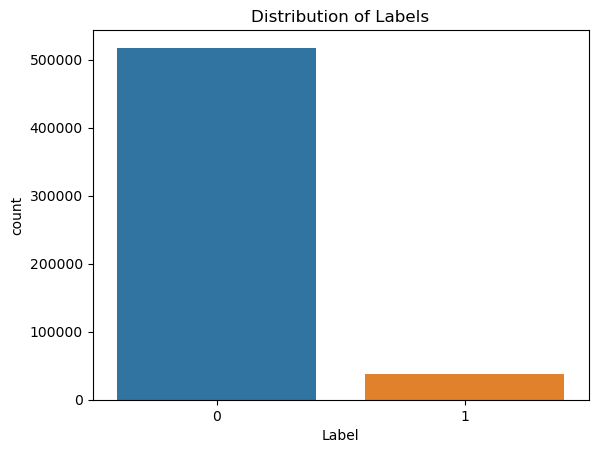

In [5]:
# Plot the distribution of the target variable
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()


In [6]:
# Drop unnamed columns
df_cleaned = df.drop(columns=df.columns[df.columns.str.contains('Unnamed')])

# Display the first few rows of the cleaned dataset
df_cleaned.head()



,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,6,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,5,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,5,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,6,5,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [7]:
# Drop rows with any null values
df_cleaned = df_cleaned.dropna()

# Display the shape of the original and cleaned datasets to see how many rows were dropped
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (555278, 88)
Cleaned dataset shape: (555278, 86)


In [8]:


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode traffic_category column
df_cleaned['traffic_category'] = label_encoder.fit_transform(df_cleaned['traffic_category'])

# Display the mapping of encoded values to original categories
print("Encoded values to original categories mapping:")
for index, category in enumerate(label_encoder.classes_):
    print(f"{index}: {category}")

# Display counts of each unique value in traffic_category column
print(df_cleaned['traffic_category'].value_counts())



Encoded values to original categories mapping:
0: Background
1: Benign
2: Bruteforce
3: Bruteforce-XML
4: Probing
5: XMRIGCC CryptoMiner
1    347431
0    170151
4     23388
2      5884
3      5145
5      3279
Name: traffic_category, dtype: int64


C:\Users\bandh\AppData\Local\Temp\ipykernel_7008\3557271431.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


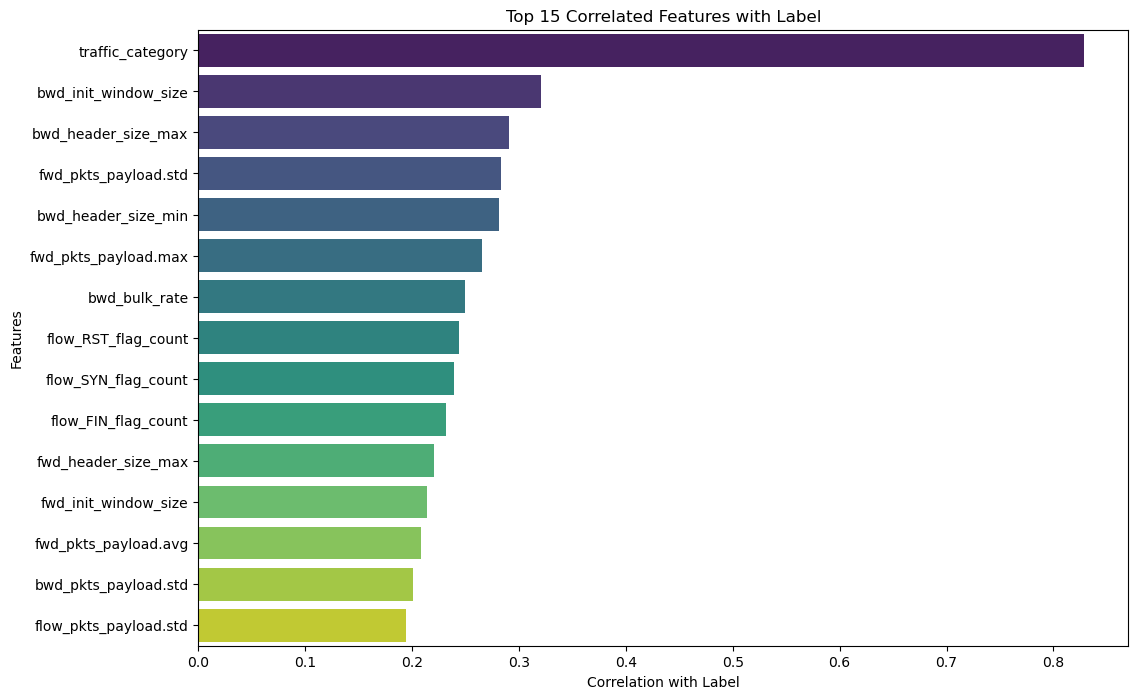

In [13]:
# Calculate correlation matrix
corr_matrix = df_cleaned.corr()

# Sort the correlations with respect to 'Label'
corr_with_label = corr_matrix['Label'].sort_values(ascending=False)


# Selecting top 15 correlated features
top_features = corr_with_label.sort_values(ascending=False).head(16)[1:]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.xlabel('Correlation with Label')
plt.ylabel('Features')
plt.title('Top 15 Correlated Features with Label')
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting features and target variable
features = ['bwd_init_window_size', 'bwd_header_size_max', 'fwd_pkts_payload.std',
            'bwd_header_size_min', 'fwd_pkts_payload.max', 'bwd_bulk_rate',
            'flow_RST_flag_count', 'flow_SYN_flag_count', 'flow_FIN_flag_count',
            'fwd_header_size_max', 'fwd_init_window_size', 'fwd_pkts_payload.avg',
            'bwd_pkts_payload.std']

target = df_cleaned['Label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], target, test_size=0.2, random_state=42)

# Initializing logistic regression model
log_reg = LogisticRegression(max_iter=10000)

# Training the model
log_reg.fit(X_train, y_train)

# Predicting on test set
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 91.88%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    103560
           1       0.00      0.00      0.00      7496

    accuracy                           0.92    111056
   macro avg       0.47      0.49      0.48    111056
weighted avg       0.87      0.92      0.89    111056


Confusion Matrix:
 [[102040   1520]
 [  7495      1]]


In [14]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separate majority and minority classes
df_majority = df_cleaned[df_cleaned['Label'] == 0]
df_minority = df_cleaned[df_cleaned['Label'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Selecting features and target variable
features = df_upsampled[['bwd_init_window_size', 'bwd_header_size_max', 'fwd_pkts_payload.std',
                         'bwd_header_size_min', 'fwd_pkts_payload.max', 'bwd_bulk_rate',
                         'flow_RST_flag_count', 'flow_SYN_flag_count', 'flow_FIN_flag_count',
                         'fwd_header_size_max', 'fwd_init_window_size', 'fwd_pkts_payload.avg',
                         'bwd_pkts_payload.std']]
target = df_upsampled['Label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)

# Training the model
log_reg.fit(X_train, y_train)

# Predicting on test set
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 55.94%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.23      0.34    103672
           1       0.54      0.89      0.67    103361

    accuracy                           0.56    207033
   macro avg       0.61      0.56      0.50    207033
weighted avg       0.61      0.56      0.50    207033


Confusion Matrix:
 [[23403 80269]
 [10941 92420]]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting features and target variable
features = df_cleaned[['bwd_init_window_size', 'bwd_header_size_max', 'fwd_pkts_payload.std',
                       'bwd_header_size_min', 'fwd_pkts_payload.max', 'bwd_bulk_rate',
                       'flow_RST_flag_count', 'flow_SYN_flag_count', 'flow_FIN_flag_count',
                       'fwd_header_size_max', 'fwd_init_window_size', 'fwd_pkts_payload.avg',
                       'bwd_pkts_payload.std']]
target = df_cleaned['Label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 90.51%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    103560
           1       0.25      0.20      0.22      7496

    accuracy                           0.91    111056
   macro avg       0.60      0.58      0.59    111056
weighted avg       0.90      0.91      0.90    111056


Confusion Matrix:
 [[99015  4545]
 [ 5997  1499]]


In [16]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate majority and minority classes
df_majority = df_cleaned[df_cleaned['Label'] == 0]
df_minority = df_cleaned[df_cleaned['Label'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Selecting features and target variable
features = df_upsampled[['bwd_init_window_size', 'bwd_header_size_max', 'fwd_pkts_payload.std',
                         'bwd_header_size_min', 'fwd_pkts_payload.max', 'bwd_bulk_rate',
                         'flow_RST_flag_count', 'flow_SYN_flag_count', 'flow_FIN_flag_count',
                         'fwd_header_size_max', 'fwd_init_window_size', 'fwd_pkts_payload.avg',
                         'bwd_pkts_payload.std']]
target = df_upsampled['Label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing Random Forest classifier with class_weight parameter
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 93.59%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    103672
           1       0.89      1.00      0.94    103361

    accuracy                           0.94    207033
   macro avg       0.94      0.94      0.94    207033
weighted avg       0.94      0.94      0.94    207033


Confusion Matrix:
 [[ 90469  13203]
 [    64 103297]]


In [ ]:
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate majority and minority classes
df_majority = df_cleaned[df_cleaned['Label'] == 0]
df_minority = df_cleaned[df_cleaned['Label'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Selecting features and target variable
features = df_upsampled[['bwd_init_window_size', 'bwd_header_size_max', 'fwd_pkts_payload.std',
                         'bwd_header_size_min', 'fwd_pkts_payload.max', 'bwd_bulk_rate',
                         'flow_RST_flag_count', 'flow_SYN_flag_count', 'flow_FIN_flag_count',
                         'fwd_header_size_max', 'fwd_init_window_size', 'fwd_pkts_payload.avg',
                         'bwd_pkts_payload.std']]
target = df_upsampled['Label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Training the model
svm_classifier.fit(X_train, y_train)

# Predicting on test set
y_pred = svm_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
